## Part 2B: Continuous shape analysis

In this notebook, we will learn the basics of shape analysis on parametric spline curves.

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from spline_models.spline_curve_model import spline_curve

### 0. Data loading

**0.1** Run the lines below to load spline-based object models of objects in the C. elegans dataset.

In [3]:
dataset='data/BBBC010/masks/spline_models.npy'
spline_models=np.load(dataset)

In [6]:
# The number of parameters in our spline model is an important parameter
M=spline_models.shape[1]-4

**0.2** Run the lines below to visualize a set of a few randomly selected models from the collection.

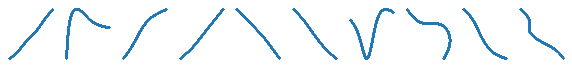

In [11]:
number=10
inds=np.random.choice(len(spline_models)-1, size=number, replace=False)

fig, ax = plt.subplots(1,number, figsize=(number,1))
for i in range(number):
    spline_model=spline_curve(M, False)
    spline_model.coefs=spline_models[i]
    
    spline_model_points=spline_model.sample(1000)
    ax[i].scatter(spline_model_points[:,0],spline_model_points[:,1],s=.2)
    ax[i].axis('off')

### 1. Continuous Kendall shape space

**1.1** To build a continuous shape space of spline curves, we will again rely on the complex representation introduced in 2A - 1.3. Run the lines below to convert the vectors of spline parameters into complex numbers.

**1.2** The normalization step is slightly more complicated in the case of parametric curves. 

**1.3** The function below computes the Fréchet mean of the spline curve dataset.

**1.4** The lines below compute the geodesic path between a randomly picked shape in the dataset and the Fréchet mean, and visualize elements along the path.

### 2. Continuous shape space PCA on the whole dataset

**2.1** The lines below perform PCA in the tangent plane around the Fréchet mean using the logarithmic and exponential maps appropriately and displays the explained variance. 

**2.2** The lines below retreive the four first modes of shape variation and visualize them around the mean.

### 3. Continuous shape space PCA on classes

We actually know that the shape distribution is bimodal, because there are dead and alive worms. To have a clearer picture of shape variability, we can thus carry out shape PCA on each class individually.

**3.1** Run the lines below to split the dataset into a collection of alive and a collection of dead C. elegans samples.  

In [ ]:
label_data='data/C. elegans/labels.npy'
labels=np.load(label_data)

**3.2** Run the lines below to visualize a set of a few randomly selected models from each collection.

In [ ]:
# Dead C. elegans
number=10
inds=np.random.choice(len(complex_preshapes_dead)-1, size=number, replace=False)

fig, ax = plt.subplots(1,number, figsize=(number,1))
for i in range(number):
    sample=complex_preshapes_dead[inds[i]]
    ax[i].scatter(sample.real,sample.imag,s=1)
    ax[i].set_title(inds[i])
    ax[i].axis('off')

In [ ]:
# Live C. elegans
number=10
inds=np.random.choice(len(complex_preshapes_live)-1, size=number, replace=False)

fig, ax = plt.subplots(1,number, figsize=(number,1))
for i in range(number):
    sample=complex_preshapes_live[inds[i]]
    ax[i].scatter(sample.real,sample.imag,s=1)
    ax[i].axis('off')

**3.3** Compute and visualize the Fréchet mean for each individual class, adapting the code from 1.3. How do they differ from what you got in 1.3?

**3.4** For each class, perform continuous shape PCA by adapting the code from 2.1.

**3.5** For each class, retreive the two first modes of shape variation and visualize them around the mean by adapting the code from 2.2. How do they differ from what you got in 2.2? And from what you got in 2A - 4.5?

### 4. Statistical shape modelling with spline curves

**4.1** The following lines generate synthetic live C. elegans shapes relying on a simple statistical model (multivariate Gaussian) built from the covariance matrix of the dataset. How does it compare to the model considered in 2A - 5.1?